In [46]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Libraries for decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For performing hyperparameter tuning ( advanced code)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go

In [3]:
data=pd.read_csv("/Users/Zac/Downloads/data2015_2016.csv")
data.head()

,SEQN,ridageyr,bmxbmi,riagendr,paq715,total_caffeine,fsd855,count_meds,section_I,section_H,diq010,ridreth1,total_na,BPXDI1,BPXSY1
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100


In [3]:
gender = data.groupby(['riagendr'])['riagendr'].count()
gender

riagendr
1    4676
2    4868
Name: riagendr, dtype: int64

In [4]:
race=data.groupby(['ridreth1'])['ridreth1'].count()
race

ridreth1
0    6804
1     330
2     427
3    1053
4     636
5     294
Name: ridreth1, dtype: int64

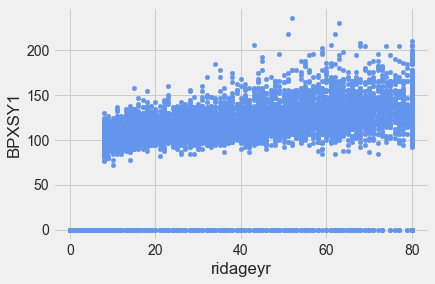

In [5]:
# Changing the color of our scatter plot
data.plot(
   x='ridageyr', 
   y='BPXSY1', 
   kind='scatter', 
   c='cornflowerblue'
)

plt.show()

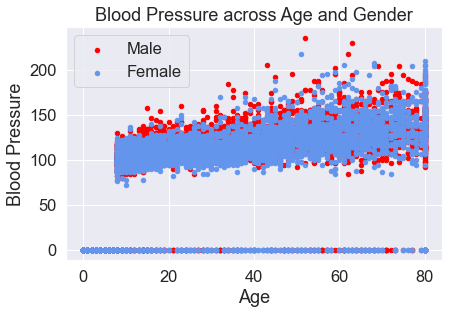

In [27]:
ax = data[data['riagendr']==1].plot(x="ridageyr", y="BPXSY1", color="Red", label="Male", kind='scatter')
data[data['riagendr']==2].plot(x="ridageyr", y="BPXSY1", color="Cornflowerblue", label="Female", kind='scatter', ax=ax)
# Add title and axis names
plt.title('Blood Pressure across Age and Gender')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure(mmHg)')
fig.set_size_inches(25.5, 25.5)

<AxesSubplot:xlabel='riagendr', ylabel='BPXSY1'>

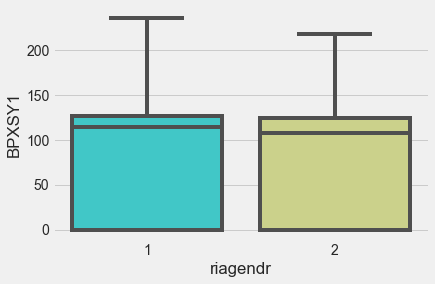

In [10]:
sns.boxplot(x='riagendr',y='BPXSY1',data=data,palette='rainbow')

In [67]:
df = data[data.total_na != 0]


/var/folders/tr/92x73hfj44ngl6mp4s96lqdh0000gp/T/ipykernel_2135/2512847798.py:4: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



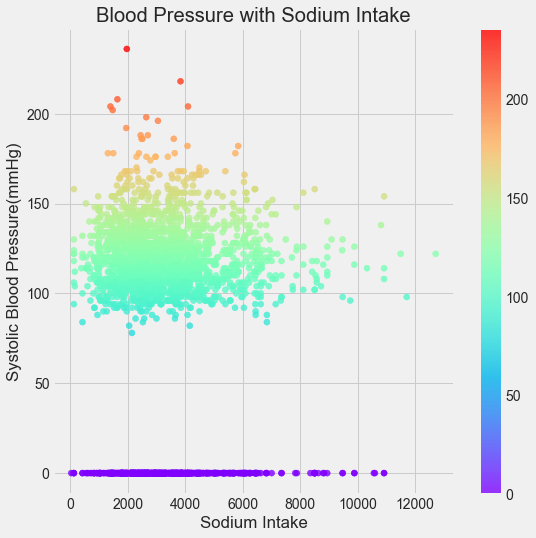

In [68]:
#Blood Presssure with Sodium Intake
plt.figure(figsize=(8,8))
plt.scatter(df.total_na, df.BPXSY1, alpha = .8, c = df.BPXSY1, cmap = 'rainbow')
cbar = plt.colorbar()

#go.Scatter(marker_colorscale=plotly.colors.sequential.Viridis)
plt.title('Blood Pressure with Sodium Intake')
plt.xlabel('Sodium Intake')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

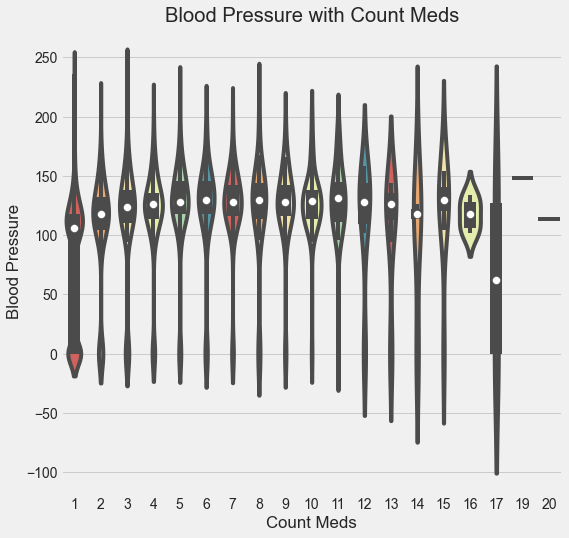

In [24]:
#Blood Pressure with Count Meds
plt.figure(figsize=(8,8))
sns.violinplot(x="count_meds", y="BPXSY1",data=data,palette=sns.color_palette("Spectral"))
plt.title('Blood Pressure with Count Meds')
plt.xlabel('Count Meds')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

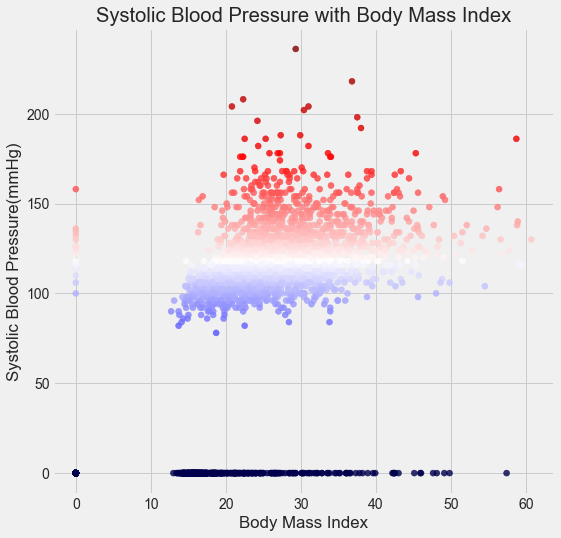

In [62]:
#Blood Pressure with body mass index
plt.figure(figsize=(8,8))
#sns.scatterplot(x="bmxbmi",y="BPXSY1",hue="BPXSY1",data=data,palette="rainbow")
plt.scatter(df.bmxbmi, df.BPXSY1, alpha = .8, c = df.BPXSY1, cmap = 'seismic')
plt.title('Systolic Blood Pressure with Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

<AxesSubplot:xlabel='ridreth1', ylabel='BPXDI1'>

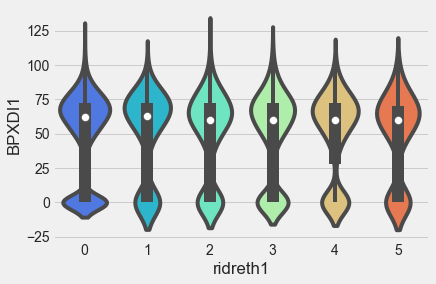

In [11]:
sns.violinplot(x="ridreth1", y="BPXSY1", data=data,palette='rainbow')

In [31]:

target=[]
for i in data["BPXSY1"]:
    if i<=140:
        target.append(0)
    else:
        target.append(1)
print(target)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [33]:
data["target"]=target
print(data)

       SEQN  ridageyr  bmxbmi  riagendr  paq715  total_caffeine  fsd855  \
0     83732        62    27.8         1       0             360       2   
1     83733        53    30.8         1       0             192       2   
2     83734        78    28.8         1       8             306       2   
3     83735        56    42.4         2       2             248       2   
4     83736        42    20.3         2       5               0       2   
...     ...       ...     ...       ...     ...             ...     ...   
9539  93698         2     0.0         1       8               0       2   
9540  93699         6    18.2         2       8               2       2   
9541  93700        35    26.0         1       0               0       2   
9542  93701         8    18.1         1       0               5       2   
9543  93702        24    21.4         2       0             192       2   

      count_meds  section_I  section_H  diq010  ridreth1  total_na  BPXDI1  \
0              9     

<AxesSubplot:>

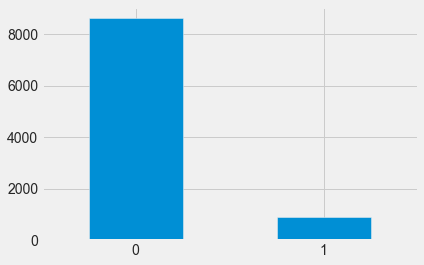

In [35]:
#Imbalanced data
data["target"].value_counts().plot(kind='bar', rot=0)

In [36]:
#Creating list for extracting categorical variables 
#We will use this list to perform label encoding

categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")

In [38]:
#Converting Attrition variable to 0 and 1
data["target"]=data['target'].astype("category").cat.codes

In [39]:
#Performing label encoding and Tranforming categorical data

label = LabelEncoder()
for column in categorical_col:
    data[column] = label.fit_transform(data[column])

In [40]:
data.head()

,SEQN,ridageyr,bmxbmi,riagendr,paq715,total_caffeine,fsd855,count_meds,section_I,section_H,diq010,ridreth1,total_na,BPXDI1,BPXSY1,target
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128,0
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146,1
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138,0
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132,0
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100,0


In [42]:
#Seperating dependent and independent variable
X = data.drop(['target',"SEQN","BPXDI1","BPXSY1"], axis=1)
y = data.target

#Splitting the data
#Random_state=42 is used to get the same output the first time you make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#Fitting the random forest model using RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
#Evaluating random forest model using the previously created function
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8987430167597765

Classification Report: 
 	Precision: 0.44776119402985076
	Recall Score: 0.10600706713780919
	F1 score: 0.17142857142857143

Confusion Matrix: 
 [[2544   37]
 [ 253   30]]

